# Análisis de Algoritmos ICI522

Los programas resuelven problemas, pero existen muchas formas de resolver un problema. Cómo saber cuándo un programa es mejor que otro?

El análisis de algoritmos es la manera de determinar los requerimientos de tiempo y espacio requeridos por un programa.

La notación O Grande o $\mathcal{O}(f(n))$ se utliza para definir una cota superior del comportamiento asintótico del crecimiento del tiempo de ejecución de un programa.

In [40]:
from platform import python_version

print(python_version())

import time

help(time.clock)

3.6.9
Help on built-in function clock in module time:

clock(...)
    clock() -> floating point number
    
    Return the CPU time or real time since the start of the process or since
    the first call to clock().  This has as much precision as the system
    records.



# Costo Constante

El costo constante se refiere al caso cuando el algoritmo tiene costo invariante al tamaño del problema $\mathcal{O}(1)$

In [55]:
import time
from time import clock

square_exp = lambda n : n**2
square = lambda n : n*n

experiments={1,100,300,500,1000,3000,5000,7000,10000}
samples=100
results_1={}
results_2={}
for n in experiments:
    result1=[]
    result2=[]
    for sample in range(samples):
        t = clock()
        v1=square_exp(n)
        t1 = clock() - t
        t = clock()
        v2=square(n)
        t2 = clock() - t
        result1.append(t1)
        result2.append(t2)
    results_1.update({n:result1})
    results_2.update({n:result2})

In [56]:
import pandas as pd

df_sq_exp=pd.DataFrame(results_1)
df_sq=pd.DataFrame(results_2)

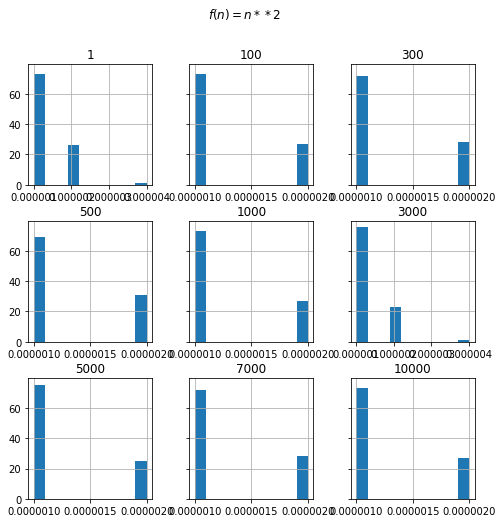

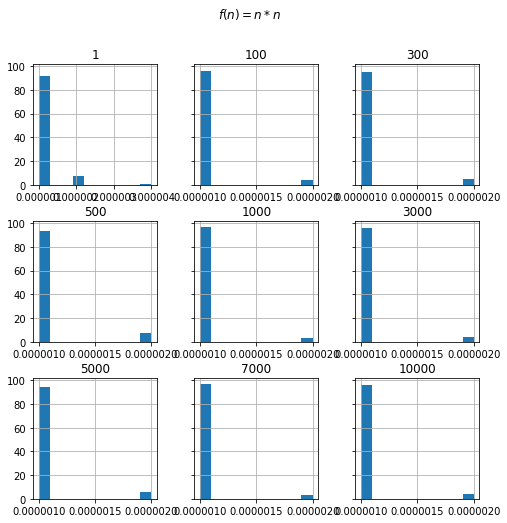

In [57]:
import matplotlib.pyplot as plt

df_sq_exp.hist(figsize=(8,8),sharey=True)
plt.suptitle(r'$f(n)=n**2$')
plt.show()

df_sq.hist(figsize=(8,8),sharey=True)
plt.suptitle(r'$f(n)=n*n$')
plt.show()

In [58]:
df_sq_exp.describe()

,1,100,1000,5000,300,10000,7000,500,3000
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.290000e-06,1.270000e-06,1.270000e-06,1.250000e-06,1.280000e-06,1.270000e-06,1.280000e-06,1.310000e-06,1.260000e-06
std,5.182527e-07,4.461960e-07,4.461960e-07,4.351941e-07,4.512609e-07,4.461960e-07,4.512609e-07,4.648232e-07,5.049252e-07
min,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06
25%,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06
50%,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06
75%,2.000000e-06,2.000000e-06,2.000000e-06,1.250000e-06,2.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,1.000000e-06
max,4.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,4.000000e-06


In [59]:
df_sq.describe()

,1,100,1000,5000,300,10000,7000,500,3000
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.100000e-06,1.040000e-06,1.030000e-06,1.060000e-06,1.050000e-06,1.040000e-06,1.030000e-06,1.070000e-06,1.040000e-06
std,3.892495e-07,1.969464e-07,1.714466e-07,2.386833e-07,2.190429e-07,1.969464e-07,1.714466e-07,2.564324e-07,1.969464e-07
min,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06
25%,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06
50%,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06
75%,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06
max,4.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06,2.000000e-06


In [46]:
from scipy import stats

# Student’s t-test
# Tests whether the means of two independent samples are significantly different.

for n in experiments:
    pvalue=stats.ttest_ind(df_sq[n],df_sq_exp[n])[1]
    print('n={0}, valor-p : {1:06.8f}'.format(n,pvalue))
    if pvalue > 0.05:
        print('Datos provienen de la misma distribucion')
    else:
        print('Datos provienen de distribuciones diferentes')
    print('----------------------------------------')

n=1000, valor-p : 0.22579679
Datos provienen de la misma distribucion
----------------------------------------
n=1, valor-p : 0.00000431
Datos provienen de distribuciones diferentes
----------------------------------------
n=100, valor-p : 0.00000002
Datos provienen de distribuciones diferentes
----------------------------------------
n=10000, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------


In [17]:
from scipy.stats import ttest_ind
import numpy as np

# problema con tama~{n}os de muestra peque~{n}os!

samples=50
data1 = np.random.normal(1,1,samples)
data2 = np.random.normal(0,1,samples)
stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Datos provienen de la misma distribucion')
else:
    print('Datos provienen de distribuciones diferentes')

stat=4.403, p=0.000
Datos provienen de distribuciones diferentes


# Costo Lineal

El costo lineal se refiere al caso cuando el algoritmo tiene costo lineal con respecto al tamaño del problema $\mathcal{O}(n)$

In [18]:
def cumsum(n):
    j=0
    for i in range(int(n)):
        j=j+i
    return j

print('La suma acumulativa de 10 es : %5d'%cumsum(10))
print('La suma acumulativa de 1000 es : %5d'%cumsum(1e3))

La suma acumulativa de 10 es :    45
La suma acumulativa de 1000 es : 499500


In [19]:
import time

experiments={1,100,1000,10000}
samples=100
results={}
for n in experiments:
    result=[]
    for sample in range(samples):
        t = time.process_time()
        cumsum(n)
        t1 = time.process_time() - t
        result.append(t1)
    results.update({n:result})


In [20]:
df_cumsum=pd.DataFrame(results)

Text(0.5, 1.0, 'Costo lineal')

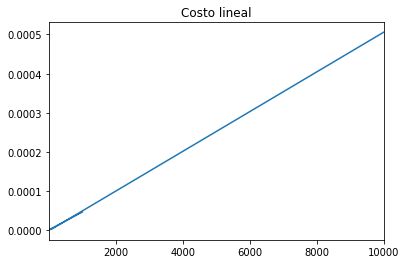

In [54]:
df_cumsum.mean().plot()
plt.title('Costo lineal')

In [12]:
df_cumsum.head()

,1000,1,100,10000
0,0.000179,0.000003,0.000008,0.000697
1,0.000166,0.000002,0.000007,0.000676
2,0.000164,0.000002,0.000012,0.000684
3,0.000164,0.000002,0.000011,0.000677
4,0.000163,0.000002,0.000007,0.000678


In [60]:
df_sq_exp.mean()

1        0.000001
100      0.000001
1000     0.000001
5000     0.000001
300      0.000001
10000    0.000001
7000     0.000001
500      0.000001
3000     0.000001
dtype: float64

In [61]:
df_sq.mean()

1        0.000001
100      0.000001
1000     0.000001
5000     0.000001
300      0.000001
10000    0.000001
7000     0.000001
500      0.000001
3000     0.000001
dtype: float64

const    1.280917e-06
x1      -1.793581e-12
dtype: float64


AttributeError: 'Int64Index' object has no attribute 'mean'

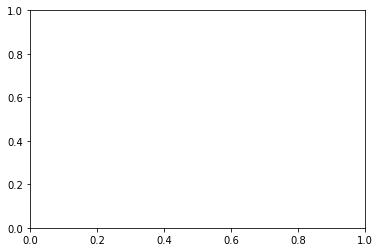

In [69]:
import statsmodels.api as sm
import seaborn as sns

x=df_sq_exp.keys()
y=df_sq_exp.mean()
x_1 = sm.add_constant(x)

#model = sm.OLS(y, x_1).fit()

#print(model.params)

sns.regplot(x=x, y=y, fit_reg=True)
plt.show()

model.summary()

In [51]:
df_sq.keys()

Int64Index([1000, 1, 100, 10000], dtype='int64')

In [70]:
help(df_sq_exp.keys())

Help on Int64Index in module pandas.core.indexes.numeric object:

class Int64Index(IntegerIndex)
 |  Immutable ndarray implementing an ordered, sliceable set. The basic object
 |  storing axis labels for all pandas objects. Int64Index is a special case
 |  of `Index` with purely integer labels. 
 |  
 |  Parameters
 |  ----------
 |  data : array-like (1-dimensional)
 |  dtype : NumPy dtype (default: int64)
 |  copy : bool
 |      Make a copy of input ndarray
 |  name : object
 |      Name to be stored in the index
 |  
 |  Attributes
 |  ----------
 |  None
 |  
 |  Methods
 |  -------
 |  None
 |  
 |  See Also
 |  --------
 |  Index : The base pandas Index type.
 |  
 |  Notes
 |  -----
 |  An Index instance can **only** contain hashable objects.
 |  
 |  Method resolution order:
 |      Int64Index
 |      IntegerIndex
 |      NumericIndex
 |      pandas.core.indexes.base.Index
 |      pandas.core.base.IndexOpsMixin
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.